# Обзор набора данных

In [1]:
# %pip install tensorflow
# %pip install Pillow
# %pip install -U numpy
# %pip install -U matplotlib
# %pip install pandas

In [2]:
import numpy as np
import pandas as pd
import json
import os
import PIL
import PIL.Image
import pathlib
import tensorflow as tf
print(tf.__version__)

import matplotlib.pyplot as plt
import matplotlib.patches as patches

2.5.0


## Просмотр одного файла

In [3]:
name = '00040534'
path = f'../data/dataset/dataset/training_data/annotations/{name}.json'
f = open(path, encoding="utf-8")
data = json.load(f)
info_df = pd.json_normalize(data['form'])
info_df.head()

,box,text,label,words,linking,id
0,"[84, 109, 136, 119]",COMPOUND,question,"[{'box': [84, 109, 136, 119], 'text': 'COMPOUN...","[[0, 37]]",0
1,"[85, 141, 119, 152]",SOURCE,question,"[{'box': [85, 141, 119, 152], 'text': 'SOURCE'}]","[[1, 38]]",1
2,"[84, 203, 155, 214]",INVESTIGATOR(S),question,"[{'box': [84, 203, 155, 214], 'text': 'INVESTI...","[[2, 44]]",2
3,"[84, 232, 141, 243]",SIGNATURE(S),question,"[{'box': [84, 232, 141, 243], 'text': 'SIGNATU...","[[3, 45]]",3
4,"[508, 170, 551, 183]",REPORTED,question,"[{'box': [508, 170, 551, 183], 'text': 'REPORT...","[[4, 43]]",4


In [4]:
info_df.label.value_counts()

answer      43
question    32
other        3
header       3
Name: label, dtype: int64

In [5]:
lab_df = info_df[info_df.label == 'other']
lab_df

,box,text,label,words,linking,id
35,"[680, 824, 701, 920]",00040534,other,"[{'box': [680, 824, 701, 920], 'text': '000405...",[],35
76,"[80, 946, 202, 956]",LORILLARO RESEARCH CENTER,other,"[{'text': 'LORILLARO', 'box': [80, 946, 123, 9...",[],76
77,"[676, 946, 732, 958]",FORM 7 5/80,other,"[{'text': 'FORM', 'box': [676, 946, 698, 957]}...",[],77


(1000, 777)


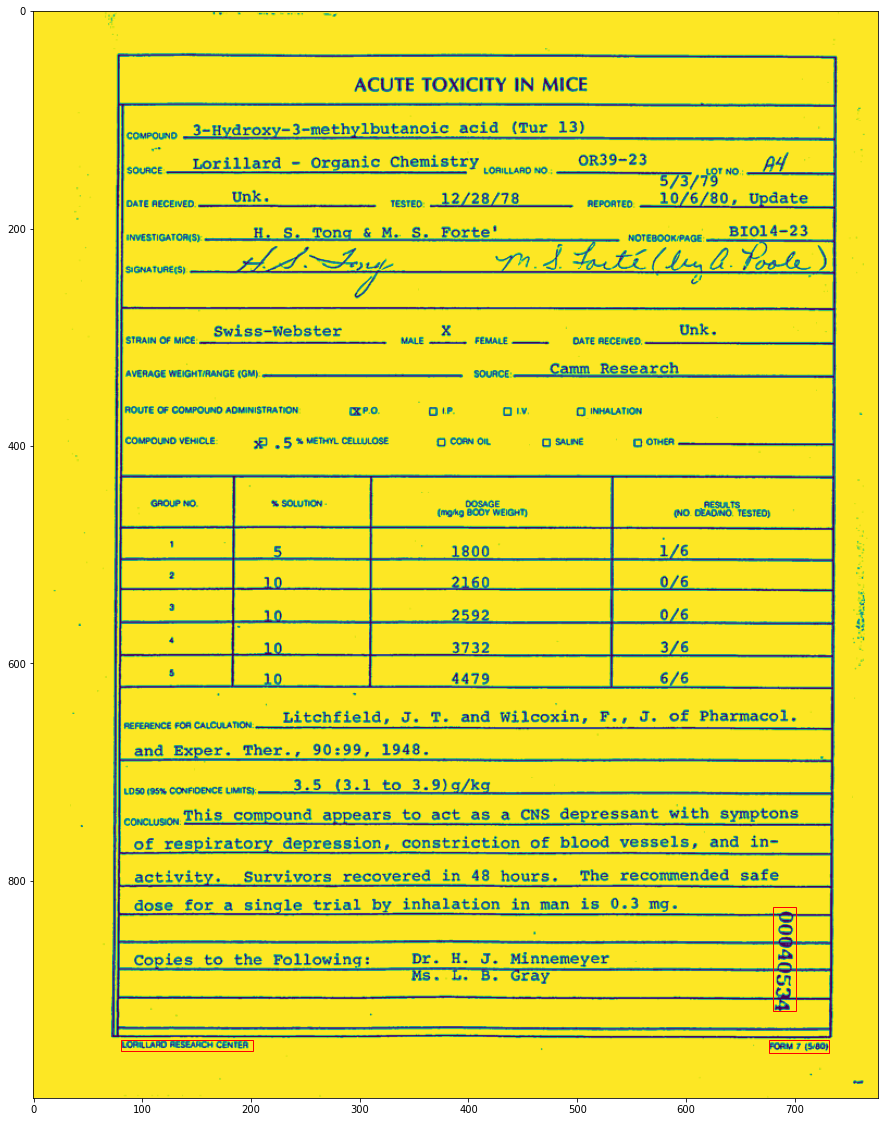

In [6]:
im = np.array(PIL.Image.open(f'../data/dataset/dataset/training_data/images/{name}.png'))
print(im.shape)
fig,ax = plt.subplots(figsize=(20, 20))
plt.imshow(im)
for lb in lab_df.box:
    x = lb[0]
    y = lb[1]
    w = lb[2] - lb[0]
    h = lb[3] - lb[1]
    rect = patches.Rectangle((x, y), w, h, linewidth=1, 
                             edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.show()

## Общая загрузка данных

In [3]:
for dirname, _, filenames in os.walk('..\data\dataset\dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

..\data\dataset\dataset\.DS_Store
..\data\dataset\dataset\testing_data\.DS_Store
..\data\dataset\dataset\testing_data\annotations\82092117.json
..\data\dataset\dataset\testing_data\annotations\82200067_0069.json
..\data\dataset\dataset\testing_data\annotations\82250337_0338.json
..\data\dataset\dataset\testing_data\annotations\82251504.json
..\data\dataset\dataset\testing_data\annotations\82252956_2958.json
..\data\dataset\dataset\testing_data\annotations\82253058_3059.json
..\data\dataset\dataset\testing_data\annotations\82253245_3247.json
..\data\dataset\dataset\testing_data\annotations\82253362_3364.json
..\data\dataset\dataset\testing_data\annotations\82254765.json
..\data\dataset\dataset\testing_data\annotations\82491256.json
..\data\dataset\dataset\testing_data\annotations\82504862.json
..\data\dataset\dataset\testing_data\annotations\82562350.json
..\data\dataset\dataset\testing_data\annotations\82573104.json
..\data\dataset\dataset\testing_data\annotations\82837252.json
..\data

In [14]:
training_data = tf.keras.preprocessing.image_dataset_from_directory('../data/dataset/dataset/training_data', 
                                                                    labels = None, label_mode = None, smart_resize = False)
# testing_data = tf.keras.preprocessing.image_dataset_from_directory('../data/dataset/dataset/testing_data')

# class_names = training_data.class_names
# print(class_names)
# print(data.list_builders())

Found 149 files belonging to 1 classes.


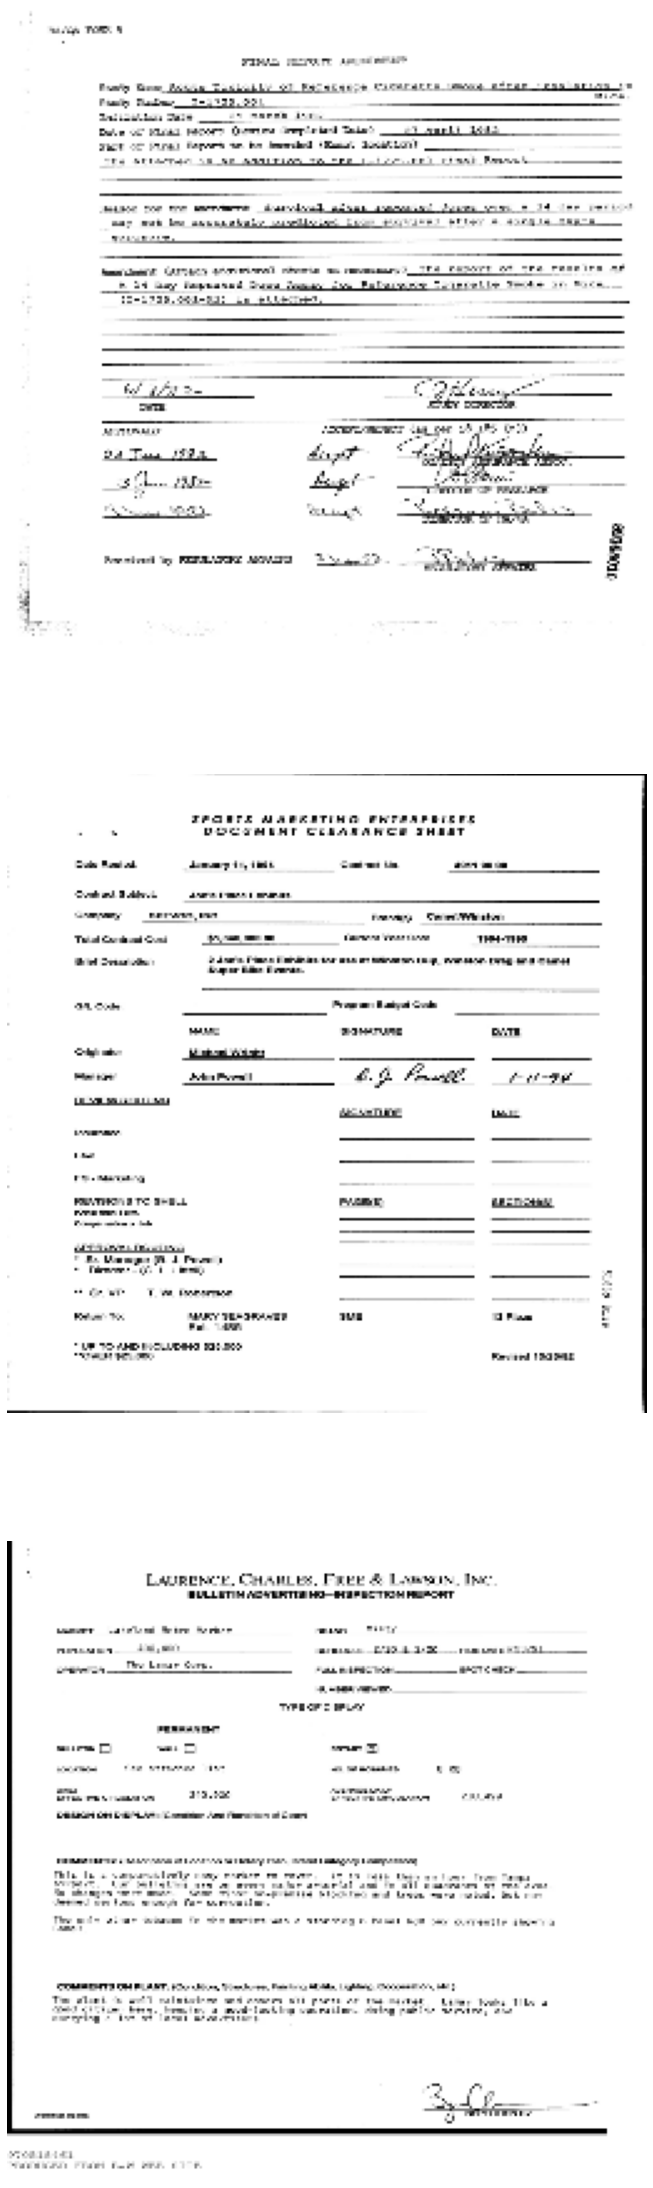

In [15]:
plt.figure(figsize=(40, 40))
for images in training_data.take(1):
    for i in range(3):
#         print(labels[i])
        ax = plt.subplot(3, 1, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(int(labels[i]))
        plt.axis("off")

In [17]:
import pathlib
dataset_url = "../data/dataset.zip"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)


ValueError: unknown url type: '../data/dataset.zip'